# Project Imports

In [ ]:
# Python Libraries
import heapq

import re
import string 

import warnings
warnings.filterwarnings('ignore')


# For data analysis
import pandas as pd
import numpy as np

# For graphs and data visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt

# ML Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML Metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import scipy
from scipy.spatial.distance import cdist


# For NLP
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load dataset

In [ ]:
netflix_data_path = '/content/drive/MyDrive/TEDe/project1/data/netflix_titles.csv'
imdb_movies_path  = '/content/drive/MyDrive/TEDe/project1/data/IMDb movies.csv'
imdb_ratings_path = '/content/drive/MyDrive/TEDe/project1/data/IMDb ratings.csv'


df_netflix  = pd.read_csv(netflix_data_path)
df_movies   = pd.read_csv(imdb_movies_path)
df_ratings  = pd.read_csv(imdb_ratings_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Ερώτημα 1**

*Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές ;
(Υπερτερεί σε σχέση με το πλήθος)*



In [ ]:
df_netflix.groupby(['type']).count()['title']

type
Movie      5377
TV Show    2410
Name: title, dtype: int64

# **Ερώτημα 2**

*Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;*

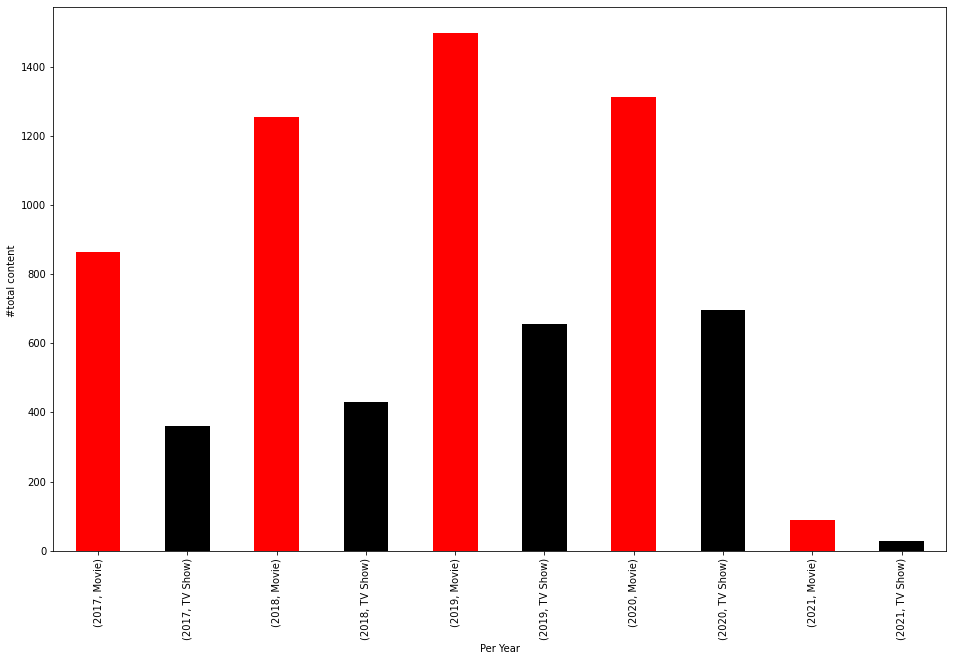

In [ ]:
# Filter the dataframe for movies/tv shows after 2016
new_df = pd.DataFrame.copy(df_netflix)
new_df = new_df.dropna(subset=['date_added'])
new_df['date_added'] = new_df['date_added'].str.split(' ').str[-1]

new_df = new_df.loc[new_df['date_added'].astype(int) > 2016]

new_df = new_df.groupby(['date_added', 'type']).count()['title']

# Plot the new dataframe
new_df.plot(kind = 'bar', figsize = (16, 10), color=('red', 'black'), align='center', legend=False)
plt.xlabel('Per Year')
plt.ylabel('#total content ')
plt.show()





# **Ερώτημα 3**

*Ποιά χώρα έχει το περισσότερο περιεχόμενο;*

In [ ]:
# Copy the dataframe 
df = pd.DataFrame.copy(df_netflix)

# Turn the comma separated countries in a list in place
df.country = df.country.str.split(', ')

# Explode that list so each row has at most one country
df = df.explode('country')

# Count all the titles by country
df = df.groupby(['country']).count()['title'].reset_index()

# Return the row with the max titles
df[df['title']==df['title'].max()]

,country,title
113,United States,3296


# **Ερώτημα 4**

*Τι είδους περιεχόμενο έχει κάθε χώρα;*

In [ ]:
# Copy the dataframe 
df = pd.DataFrame.copy(df_movies)

# Turn the comma separated countries in a list at each row in place and explode
# so that the new dataframe contains at most one country per row
df.country = df.country.str.split(', ')
df = df.explode('country')

# Turn the comma separated genres in a list at each row in place and explode
# so that the new dataframe contains at most one genre per row
df.genre = df.genre.str.split(', ')
df = df.explode('genre')

# Drop the unneccessary columns
df = df[['country','genre']]

# Group all genres by country, remove the duplicate genres and join them as a string
df = df.groupby('country').genre.apply(lambda x: x.unique().tolist()).reset_index()
df['genre'] = df['genre'].apply(lambda x: set(x)).apply(lambda x: ', '.join(map(str, x)))

# Display the dataframe
df

,country,genre
0,Afghanistan,"Romance, Drama, Biography, History, War, Adven..."
1,Albania,"Thriller, Romance, Family, Drama, Comedy, Hist..."
2,Algeria,"Fantasy, Thriller, Romance, Drama, Musical, Bi..."
3,Andorra,"Thriller, Horror, Drama, Comedy"
4,Angola,"Fantasy, Drama, Comedy, War, Crime, Horror, Ac..."
...,...,...
189,Yemen,"Fantasy, Romance, Drama, Musical, Comedy"
190,Yugoslavia,"Fantasy, Thriller, Family, Romance, Drama, Ani..."
191,Zaire,"Thriller, Drama, Musical, Comedy"
192,Zambia,"Thriller, Sci-Fi, Drama, Comedy, Action"


# **Ερώτημα 5**

*Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε
κάθε χώρα. Κάντε το ίδιο και για τις σειρές*

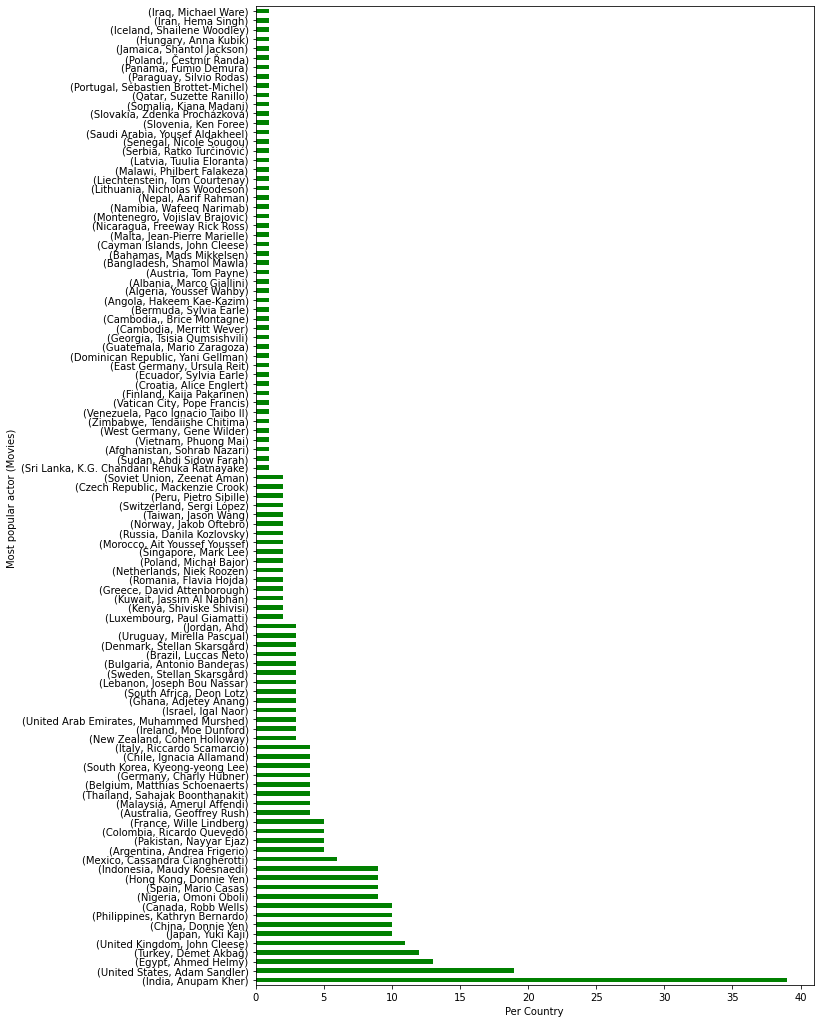

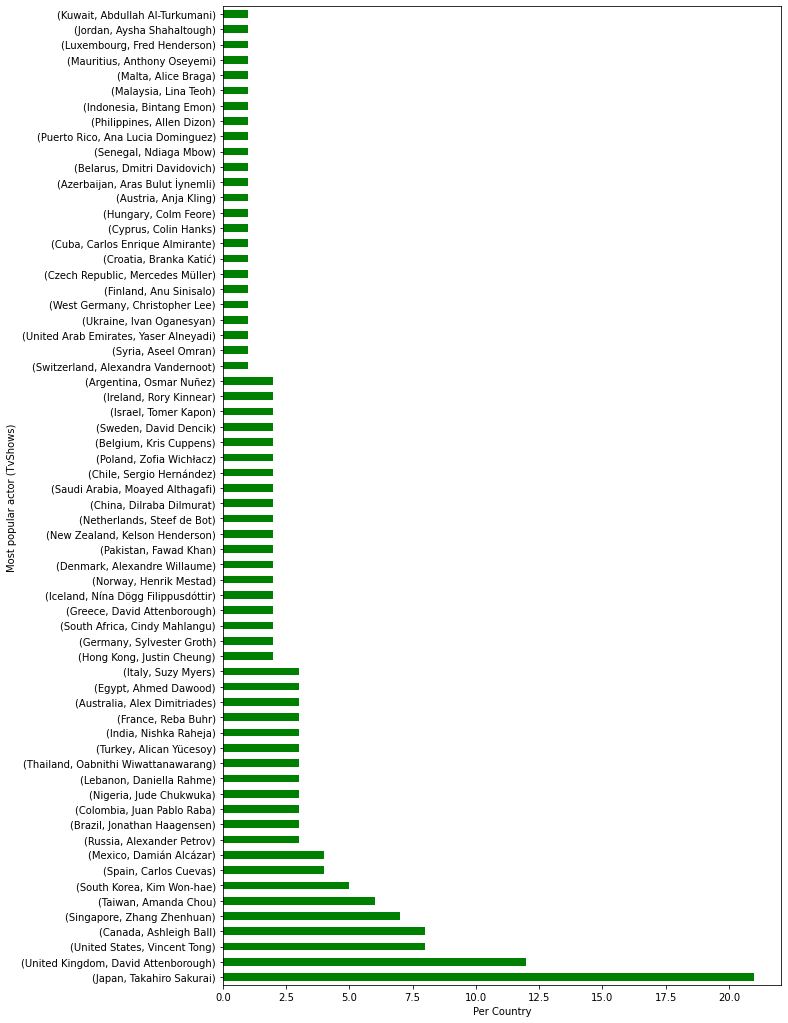

In [ ]:
# Copy the dataframe 
df = pd.DataFrame.copy(df_netflix)

# Turn the comma separated countries in a list at each row in place and explode
# so that the new dataframe contains at most one country per row
df.country = df.country.str.split(', ')
df = df.explode('country')

# Turn the comma separated genres in a list at each row in place and explode
# so that the new dataframe contains at most one genre per row
df.cast = df.cast.str.split(', ')
df = df.explode('cast')

df.dropna(subset=['cast'])

# Get Movies and TV Shows
df_tvshows = df.loc[df['type'] == 'TV Show']
df_movies  = df.loc[df['type'] == 'Movie']

# Drop unneccessary columns
df_tvshows = df_tvshows[['country','cast','title']]
df_movies = df_movies[['country','cast','title']]


# Count in how many movies did an actor participate (for one country) 
df_movies = df_movies.groupby(['country','cast']).count()['title'].reset_index()
df_movies = df_movies.sort_values('title', ascending=False).drop_duplicates(['country'])
df_movies = df_movies.set_index(['country','cast'])

df_movies.plot(kind = 'barh', figsize = (10, 18), color='green', align='center', legend=False)
plt.xlabel('Per Country')
plt.ylabel('Most popular actor (Movies) ')
plt.show()


# Same for TV Shows
df_tvshows = df_tvshows.groupby(['country','cast']).count()['title'].reset_index()
df_tvshows = df_tvshows.sort_values('title', ascending=False).drop_duplicates(['country'])
df_tvshows = df_tvshows.set_index(['country','cast'])


df_tvshows.plot(kind = 'barh', figsize = (10, 18), color='green', align='center', legend=False)
plt.xlabel('Per Country')
plt.ylabel('Most popular actor (TvShows) ')
plt.show()


# **Ερώτημα 6**

*Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες.
Αληθεύει αυτό; Φτιάξτε ένα γράφημα το οποίο συγκεντρώνει το πλήθος των
ταινιων ανάλογα με την προτεινόμενη ηλικία (αναφερόμαστε στη στήλη rating). Τα
όρια καθορίζονται σύμφωνα με τον παρακάτω πίνακα. Κάντε το ίδιο γράφημα και
για τις σειρές.*

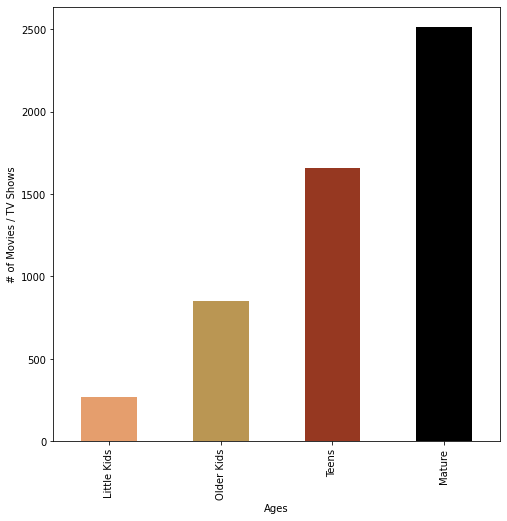

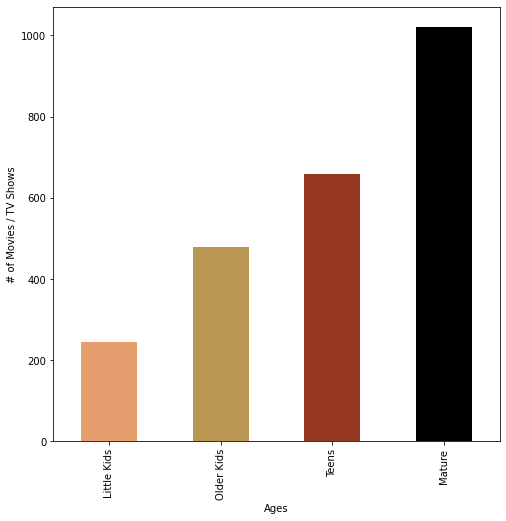

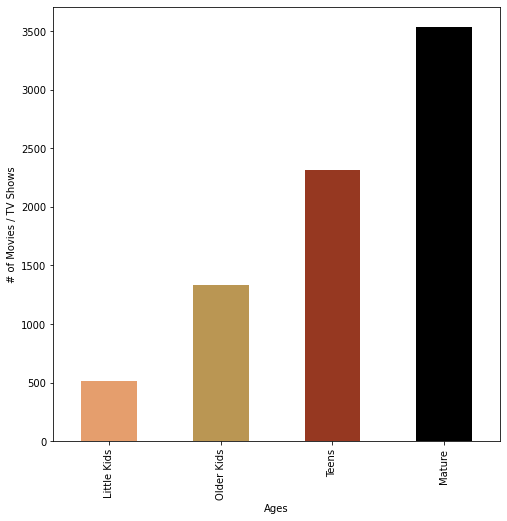

In [ ]:

#
# A function that encapsulates the data analysis of the ages compared to the ratings
# 
# param title_type: Filters out the netflix dataframe if it's value is 'TV Show' or 'Movies'.
#                   If it's value is 'Both' it adds both TV Show and Movie rows 
#
def analyze_ages_to_title_type(title_type):

  if (title_type not in ['TV Show', 'Movie', 'Both']):
    return

  # Copy dataframe
  df = pd.DataFrame.copy(df_netflix)

  # If we want to filter based on TV Shows / Movies
  if (title_type != 'Both'):
    df = df[lambda x: x['type'] == title_type]

  # Group up the dataframe based on the ratings after filtering on type
  df = df.groupby(['rating']).size().reset_index()
  df.columns = ['rating', 'count']

  # Sum up the different type of ratings
  little_kids_val = df.loc[df['rating'].isin(['G', 'TV-Y', 'TV-G'])]['count'].sum()
  older_kids_val  = df.loc[df['rating'].isin(['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG'])]['count'].sum()
  teens_val  = df.loc[df['rating'].isin(['PG-13', 'TV-14'])]['count'].sum()
  mature_val  = df.loc[df['rating'].isin(['R', 'NC-17', 'TV-MA'])]['count'].sum()


  # Create a new dataframe based on the different ages to ratings 
  age_df = pd.DataFrame(
        {"Ages": [little_kids_val, older_kids_val, teens_val, mature_val]}, 
        index=['Little Kids', 'Older Kids', 'Teens', 'Mature'])

  # Plot the new dataframe
  age_df.plot(kind = 'bar', figsize = (8, 8), 
                color=('#e59e6d', '#ba9653', '#963821', 'black'), align='center', legend=False)
  plt.xlabel('Ages')
  plt.ylabel('# of Movies / TV Shows')
  plt.show()


# Use the function above to analyze the movies/tv shows for all ages
analyze_ages_to_title_type('Movie')
analyze_ages_to_title_type('TV Show')
analyze_ages_to_title_type('Both')


# **Ερώτημα 7**

*Αν ένας παραγωγός ήθελε να έχει υψηλή ακροαματικότητα, σκέφτεται ότι θα ήταν
ίσως καλύτερα να βγάλει την ταινία του σε μία εποχή που δεν υπάρχει
ανταγωνισμός. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα
για να τον βοηθήσετε να επιλέξει τη σωστή χρονική περίοδο.*

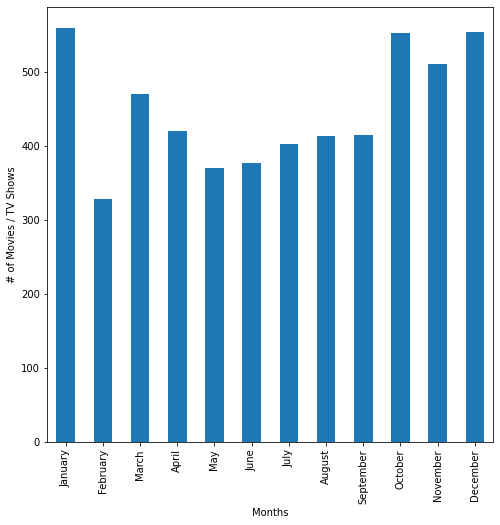

In [ ]:
# Copy dataframe
df = pd.DataFrame.copy(df_netflix)

# Get movies 
df = df[lambda x: x['type'] == 'Movie']

# Get only date_added column
df = df[['date_added']]

# Split date_added string and get only month
df['date_added'] = df['date_added'].str.split(' ').str[0]

# Group data based on month and count all movies for every month
df = df.groupby(['date_added']).size().reset_index()
df.columns = ['date_added', 'count']

date_to_movies = pd.DataFrame(
        {"Movies": df['count'].tolist()}, 
        index=df['date_added'].tolist())


# Re-index months in correct order
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
date_to_movies = date_to_movies.reindex(months, axis=0)


date_to_movies.plot(kind = 'bar', figsize = (8, 8), align='center', legend=False)
plt.xlabel('Months')
plt.ylabel('# of Movies / TV Shows')
plt.show()


# **Ερώτημα 8**

*Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου*

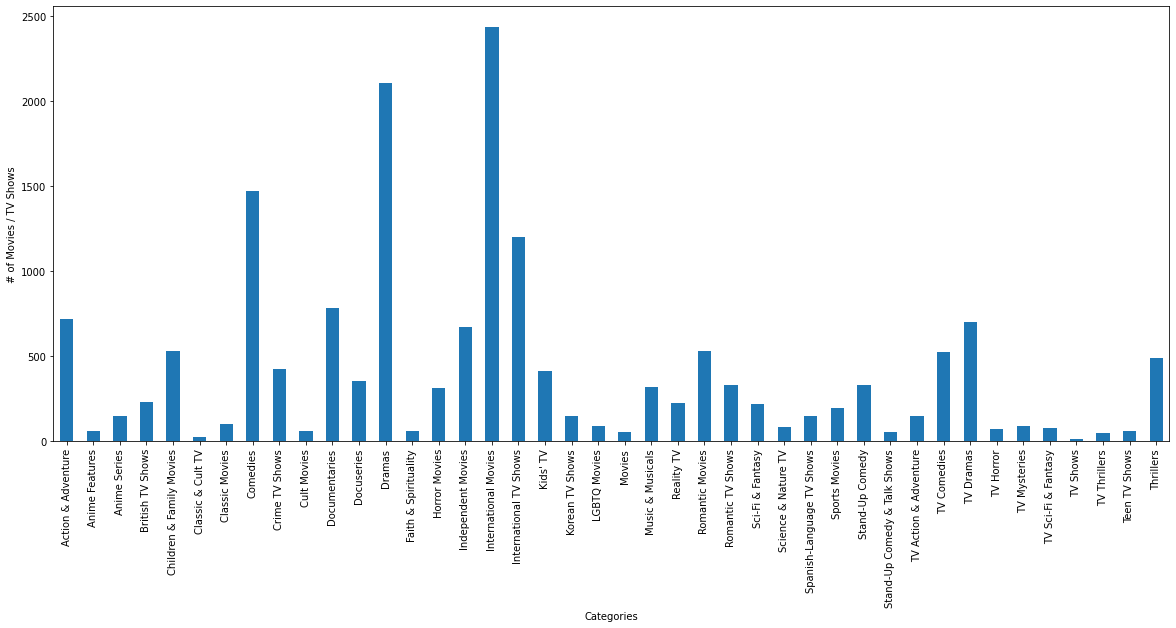

In [ ]:
# Copy the dataframe 
df = pd.DataFrame.copy(df_netflix)

# Turn the comma separated countries in a list at each row in place and explode
# so that the new dataframe contains at most one country per row
df.listed_in = df.listed_in.str.split(", ")
df = df.explode('listed_in')

df = df.groupby(['listed_in']).size().reset_index()
df.columns = ['listed_in', 'count']


listedin_to_movies = pd.DataFrame(
        {"Movies": df['count'].tolist()}, 
        index=df['listed_in'].tolist())

listedin_to_movies.plot(kind = 'bar', figsize = (20, 8), align='center', legend=False)
plt.xlabel('Categories')
plt.ylabel('# of Movies / TV Shows')
plt.show()

# **Ερώτημα 9**

*Μελετηστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα*

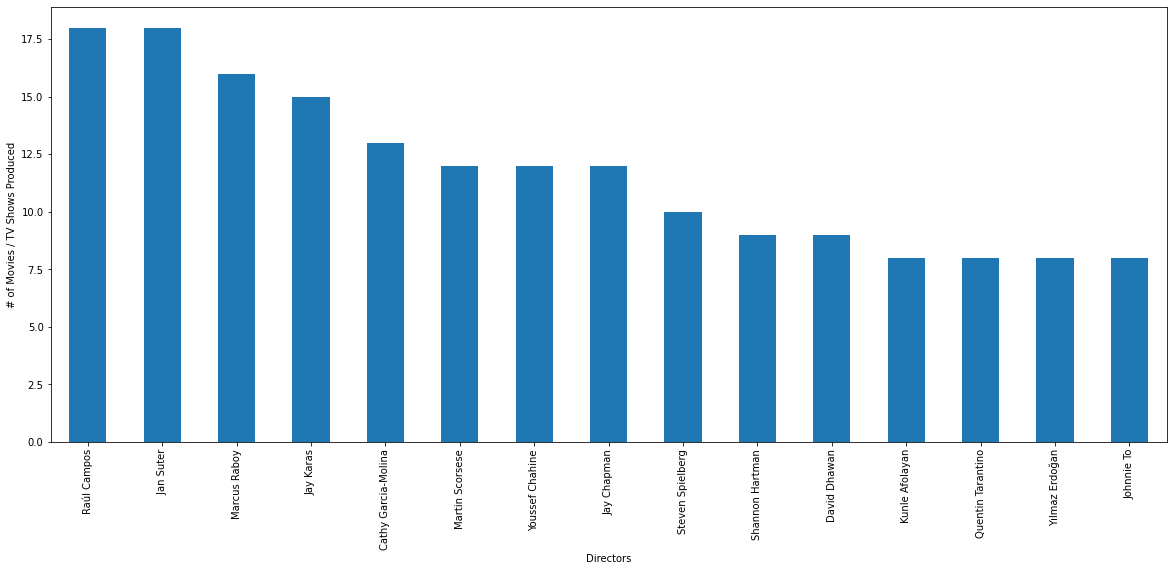

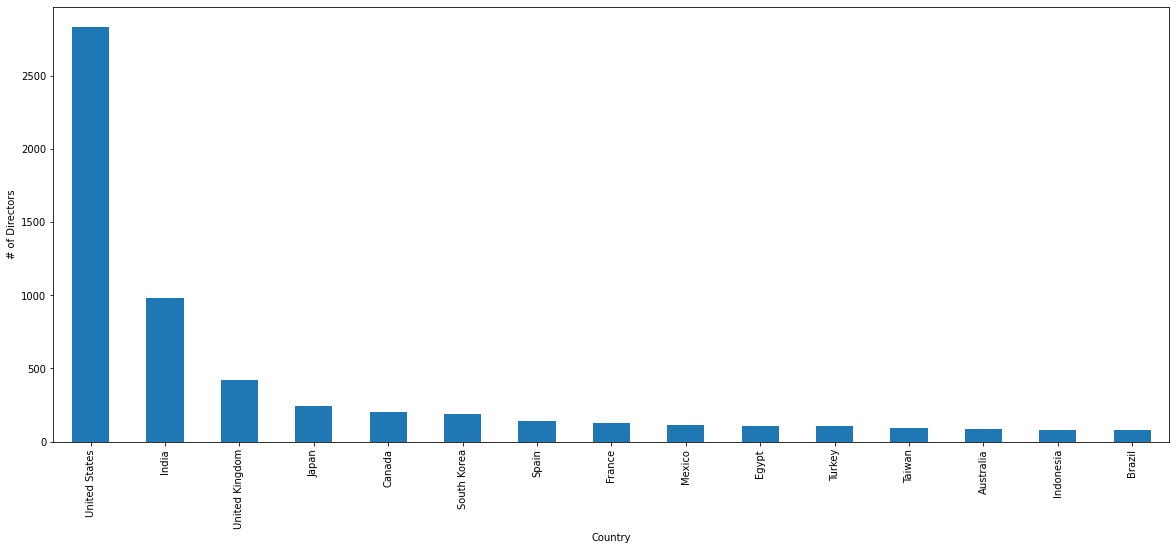

In [ ]:
# Copy the dataframe 
df = pd.DataFrame.copy(df_netflix)

# Turn the comma separated countries in a list at each row in place and explode
# so that the new dataframe contains at most one country per row
df.director = df.director.str.split(',')
df = df.explode('director')

df1 = df[['director']]
df1 = df1.groupby(['director']).size().reset_index()
df1.columns = ['director', 'produced_count']
df1 = df1.sort_values(['produced_count'], ascending = False).head(15)
df1


directors_to_movies = pd.DataFrame(
        {"Producings": df1['produced_count'].tolist()}, 
        index=df1['director'].tolist())

directors_to_movies.plot(kind = 'bar', figsize = (20, 8), align='center', legend=False)
plt.xlabel('Directors')
plt.ylabel('# of Movies / TV Shows Produced')
plt.show()

df2 = df[['country']]
df2 = df2.groupby(['country']).size().reset_index()
df2.columns = ['country', 'directors_per_country']
df2 = df2.sort_values(['directors_per_country'], ascending = False).head(15)
df2


countries_to_directors = pd.DataFrame(
        {"Directors": df2['directors_per_country'].tolist()}, 
        index=df2['country'].tolist())

countries_to_directors.plot(kind = 'bar', figsize = (20, 8), align='center', legend=False)
plt.xlabel('Country')
plt.ylabel('# of Directors')
plt.show()

# **Ερώτημα 10**

*Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με το
αριθμό των seasons.* 

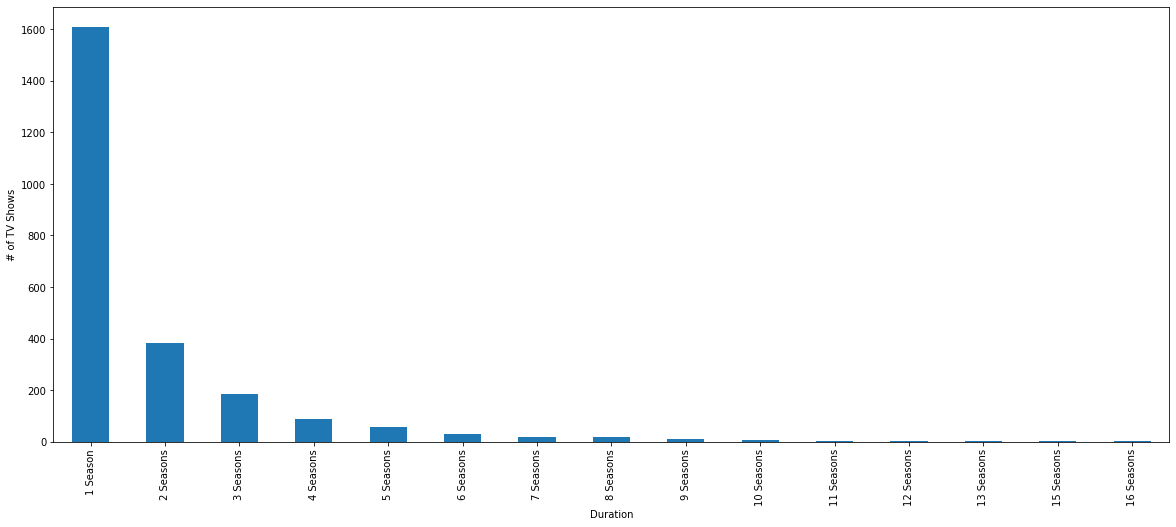

In [ ]:
# Copy dataframe
df = pd.DataFrame.copy(df_netflix)

df = df[lambda x: x['type'] == 'TV Show']

df = df.groupby('duration').size().reset_index()
df.columns = ['duration', 'count']
df = df.sort_values(['count'], ascending = False).head(15)
df

tvshow_duration = pd.DataFrame(
        {"Duration": df['count'].tolist()}, 
        index=df['duration'].tolist())

tvshow_duration.plot(kind = 'bar', figsize = (20, 8), align='center', legend=False)
plt.xlabel('Duration')
plt.ylabel('# of TV Shows')
plt.show()


# **Ερώτημα 11**

*Αξιοποιήστε τα υπόλοιπα αρχεία της εργασίας για να απαντήσετε στο ερώτημα:
Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία; Θα χρειαστεί να συννενώσετε
κατάλληλα τα αρχεία που σας δίνονται ώστε να κρατήσετε τις ταινίες του netflix για
τις οποίες υπάρχουν ratings στο IMBD.*

In [ ]:
# Equijoin the netflix and IMDb movies tables on the 'title' column/key
df = pd.merge(df_netflix, df_movies, on='title')

# Equijoin the table created above and the IMDb ratings table on the 'imdb_title_id' column/key
df = df[['imdb_title_id', 'title']]
df = pd.merge(df, df_ratings, on='imdb_title_id')

# Sort on most total_votes and mean_votes at the same time and keep the top 5 results
df = df.sort_values(['total_votes', 'mean_vote'], ascending = False).head(5)
df

,imdb_title_id,title,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
1063,tt1375666,Inception,8.8,2002816,8.7,9.0,703342,606793,393727,168238,58824,26188,13108,8507,6816,17273,9.0,1688.0,9.0,502976.0,8.7,745750.0,8.1,132389.0,8.8,1202678.0,9.1,1185.0,9.0,383603.0,8.8,605876.0,8.1,109004.0,8.6,278964.0,8.8,246.0,8.8,107833.0,8.6,127806.0,8.1,20516.0,8.2,894.0,8.7,246718.0,8.7,799420.0
1752,tt0110912,Pulp Fiction,8.9,1780147,8.7,9.0,659972,526960,322054,136532,50439,26127,13869,10197,8749,25248,9.1,1279.0,8.9,361519.0,8.9,689718.0,8.7,173976.0,8.9,1093553.0,9.2,878.0,9.0,285498.0,9.0,581379.0,8.8,144777.0,8.5,207176.0,8.6,203.0,8.6,67554.0,8.5,98421.0,8.3,25850.0,8.6,907.0,8.9,274101.0,8.9,712280.0
649,tt1853728,Django Unchained,8.4,1317856,8.4,9.0,281198,416783,369975,155872,48348,18205,8612,5275,4088,9500,8.7,908.0,8.6,325635.0,8.4,470648.0,8.0,94855.0,8.4,809618.0,8.7,666.0,8.7,260419.0,8.4,388985.0,8.0,78995.0,8.3,162231.0,8.2,108.0,8.5,58455.0,8.3,74066.0,8.1,13976.0,7.9,837.0,8.4,147057.0,8.4,515747.0
1926,tt0108052,Schindler's List,8.9,1183248,8.7,9.0,441897,373080,214596,80314,26709,12702,6134,4489,4241,19086,9.0,665.0,9.0,223090.0,8.9,468161.0,8.7,132554.0,8.9,712228.0,9.1,481.0,9.0,172138.0,8.9,383039.0,8.7,107366.0,9.0,158875.0,8.8,111.0,9.0,46454.0,8.9,78434.0,8.9,22628.0,8.7,847.0,9.0,174720.0,8.9,490224.0
147,tt0169547,American Beauty,8.3,1049009,8.2,8.0,235199,286660,280938,139714,50133,21336,10565,6555,5306,12603,8.6,388.0,8.5,194136.0,8.3,453812.0,8.1,114080.0,8.4,626981.0,8.7,254.0,8.6,139120.0,8.4,360059.0,8.1,92481.0,8.1,169354.0,8.2,84.0,8.2,51625.0,8.1,88030.0,7.9,19707.0,8.0,861.0,8.4,182112.0,8.3,456395.0


# **Recommendation System**





# Preprocessing

Η παρακάτω συνάρτηση θα εφαρμοστεί σε κάθε description, αφαιρώντας τα puncuation και τα whitespaces. Στη συνέχεια μετατρέπει το κείμενο των descriptions σε πεζά και έπειτα του "κόβει" τα stop words και εφαρμόζει lemmatization. 

In [ ]:
def preprocess_text(text):

    # Remove all punctuation
    text = re.sub(r'[^\w\d\s]', ' ', text)
  
    # Collapse all white spaces
    text = re.sub(r'\s+', ' ', text)
  
    # Convert to lower case
    text = re.sub(r'^\s+|\s+?$', '', text.lower())
  
    # Remove stop words and perform lemmatization
    stop_words = stopwords.words()
    lemmatizer = WordNetLemmatizer() 
    return ' '.join(
        lemmatizer.lemmatize(term) 
        for term in text.split()
        if term not in set(stop_words)
    )

Δημιουργούμε ένα αντίγραφο του netflix dataframe, εφαρμόζουμε την παραπάνω συνάρτηση (preprocess_text) σε κάθε description και εξάγουμε τις τιμές των columns σε λίστες

In [ ]:

df = pd.DataFrame.copy(df_netflix)

df = df[['show_id', 'title', 'description']]

df['processed_description'] = df['title'] + " " + df['description']

df['processed_description'] = df['processed_description'].apply(lambda row : preprocess_text(row))


processed_description_list = df.processed_description.tolist()
description_list = df.description.tolist()
title_list = df.title.tolist()

# Aux. function
def print_dict(input_dict):
  for x in input_dict.keys():
    print(f" '{x}' -> {input_dict[x]}")
  print("\n\n")


*Διατρέξτε τους πίνακες από το 1 και υπολογίστε τις ομοιότητες όλων των ταινιών μεταξύ
τους (και με τους δύο τρόπους 2.α, 2.β). Έπειτα αποθηκεύστε για κάθε ταινία τις 100 πιο
όμοιες με αυτή σε ένα python dictionary.*

Η παρακάτω συνάρτηση "εγκλωβίζει" την παραπάνω διαδικασία, αφού θα φτιαχτούν αρκετά τέτοια dictionaries, αλλα με διαφορετική μέθοδο

In [ ]:
def build_similar_dicts(method, ngram_range, N=10):
  
  # Handle faulty parameters
  if ((method != 'boolean' and method != 'tf-idf') or 
      (ngram_range != 'unigram' and ngram_range != 'bigram') or N <= 0):
    return []

  vectorizer, metric = None, None
  ngram = (1, 1) if (ngram_range == 'unigram') else (2, 2)
  
  if (method == 'boolean'):
    metric = 'jaccard'
    vectorizer = CountVectorizer(ngram_range=ngram, min_df=2, max_df=0.96, 
                                 max_features=1000, binary=True)
  else:
    metric = 'cosine'
    vectorizer = TfidfVectorizer(ngram_range=ngram, min_df=2, max_df=0.96, max_features=1000)

  vect_transform = vectorizer.fit_transform(processed_description_list)

  test = pd.DataFrame(vect_transform.toarray())
  
  metric_scores = (1 - cdist(test, test, metric=metric))

  titles_dict = {}

  for i in range(len(metric_scores)):
    
    title_score = metric_scores[i].tolist()

    # Add the (score, index) to a tuple before sorting
    for j in range(len(title_score)):
      title_score[j] = (title_score[j], j)
    
    # Sort the scores
    title_score = heapq.nlargest(N + 1, title_score)

    # Retrieve the top N titles by sorting and finding the
    # proper index from the tuple
    titles = []

    for k in range(N + 1):
      tup = title_score[k]
      row_index = tup[1]
      titles.append(title_list[row_index])
    
    titles_dict[title_list[i]] = titles[1:]

  return titles_dict


ubow_dict = build_similar_dicts('boolean', 'unigram', 100)
bbow_dict = build_similar_dicts('boolean', 'bigram', 100)

utfidf_dict = build_similar_dicts('tf-idf', 'unigram', 100)
btfidf_dict = build_similar_dicts('tf-idf', 'bigram', 100)


*Πρόβλεψη (1): Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο ένα τίτλο, ένα
ακέραιο αριθμό N και τον τρόπο εύρεσης της ομοιότητας (boolean ή tf-idf σύμφωνα
με τα 1,2) και επιστρέφει τους Ν πιο όμοιους τίτλους.*


In [ ]:
def get_similar_movies1(title, method, ngram_range, N=10):

  title_dict = None

  if   (method == 'boolean' and ngram_range == 'unigram'): title_dict = ubow_dict
  elif (method == 'boolean' and ngram_range == 'bigram'):  title_dict = bbow_dict
  elif (method == 'tf-idf'  and ngram_range == 'unigram'): title_dict = utfidf_dict
  elif (method == 'tf-idf'  and ngram_range == 'bigram'):  title_dict = btfidf_dict
  else: return []

  top_n_movies = title_dict[title]
  
  return top_n_movies[:N]


print(f"Boolean, unigram: {get_similar_movies1('Inception', method='boolean', ngram_range='unigram')}\n")
print(f"Boolean, bigram:  {get_similar_movies1('Inception', method='boolean', ngram_range='bigram')}\n")
print(f"TF-IDF, unigram:  {get_similar_movies1('Inception', method='tf-idf',  ngram_range='unigram')}\n")
print(f"TF-IDF, bigram:   {get_similar_movies1('Inception', method='tf-idf',  ngram_range='bigram')}\n")


Boolean, unigram: ['Greenleaf', 'Budhia Singh: Born to Run', 'The Mayor', 'La Gran Ilusión', 'King of Peking', 'Tikli and Laxmi Bomb', 'Murder Mountain', 'The Body', 'Lionheart', 'Hitch']

Boolean, bigram:  ['Inception', 'Dark', 'Candyflip', 'ANIMA', 'Black Mirror: Bandersnatch', 'Altered Carbon', "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS", "Zumbo's Just Desserts", 'Zulu Man in Japan', 'Zubaan']

TF-IDF, unigram:  ['Budhia Singh: Born to Run', 'Greenleaf', 'La Gran Ilusión', 'The Mayor', 'Aitraaz', 'Portlandia', 'Fred Armisen: Standup For Drummers', 'King of Peking', 'Tikli and Laxmi Bomb', 'Murder Mountain']

TF-IDF, bigram:   ['(Un)Well', '1994', '1898: Our Last Men in the Philippines', '100 Days Of Solitude', '12 ROUND GUN', 'Candyflip', 'Black Mirror: Bandersnatch', 'Altered Carbon', "Zumbo's Just Desserts", 'Zulu Man in Japan']



**Ποιοτικές διαφορές:**



1. Και η μέθοδος BoW και η TF-IDF παράγουν αραιούς πίνακες

2. Αν και η μέθοδος TF-IDF βασίζεται στην BoW, παράγει καλύτερα αποτελέσματα αφού εξάγει τις πιο "σημαντικές" λέξεις απο ένα corpus

3. Και στις δύο μεθόδους με unigrams οι λέξεις ομαδοποιούνται ανά μία, με αποτέλεσμα να χάνεται η σειρά τους, άρα και η σημασία της κάθε πρότασης. 

4. Με την χρήση των bigrams οι λέξεις ομαδοποιούνται ανά δύο, με αποτέλεσμα να διατηρείται καλύτερα το γενικότερο πλαίσιο της πρότασης απο ότι στην μέθοδο των unigrams. Συνεπώς, παράγονται καλύτερα αποτελέσματα κατά το ταίριασμα ενός document με ένα corpus.



*Πρόβλεψη (2): Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο μια ακολουθία
από λέξεις (π.χ. Περιγραφή μιας ταινίας), ένα ακέραιο αριθμό N και τον τρόπο
εύρεσης της ομοιότητας και επιστρέφει τους Ν πιο όμοιους τίτλους με βάση αυτή τη
περιγραφή. Το συγκεκριμένο σύστημα θα μετασχηματίζει τη περιγραφή της
εισόδου σε ένα feature vector, ανάλογα με την επιλεγμένη μεθοδολογία, και
χρησιμοποιώντας τους κατάλληλους πίνακες και μετρικά από τα 1,2 θα επιστρέφει
τις πιο σχετικές ταινίες.*

Η παρακάτω συνάρτηση, έχοντας λάβει ένα (user inputted) `@param description`, το προσθέτει στην λίστα όλων 
των descriptions και εφαρμόζει τα ίδια βήματα με την συνάρτηση `build_similar_dicts`, παίροντας μόνο υπ'οψιν τα scores του `@param description`


In [14]:
def get_similar_movies2(description, method, ngram_range, N=10):
  
  # Handle faulty parameters
  if ((method != 'boolean' and method != 'tf-idf') or 
      (ngram_range != 'unigram' and ngram_range != 'bigram') or N <= 0):
    return []

  vectorizer, metric = None, None
  ngram = (1, 1) if (ngram_range == 'unigram') else (2, 2)

  if (method == 'boolean'):
    metric = 'jaccard'
    vectorizer = CountVectorizer(ngram_range=ngram, min_df=2, max_df=0.96, 
                                 max_features=1000, binary=True)
  else:
    metric = 'cosine'
    vectorizer = TfidfVectorizer(ngram_range=ngram, min_df=2, max_df=0.96, max_features=200)

  new_proc_desc_list = list.copy(processed_description_list)
  new_proc_desc_list.append(description)

  vect_transform = vectorizer.fit_transform(new_proc_desc_list)

  test = pd.DataFrame(vect_transform.toarray())
  
  metric_scores = (1 - cdist(test, test, metric=metric))

  title_score = metric_scores[-1].tolist()

  # Add the (score, index) to a tuple before sorting
  for j in range(len(title_score)):
    title_score[j] = (title_score[j], j)
    
  # Sort the scores
  title_score = heapq.nlargest(N+1, title_score)

  # Retrieve the top N titles by sorting and finding the
  # proper index from the tuple
  titles = []

  for k in range(N+1):
    tup = title_score[k]

    row_index = tup[1]

    if (row_index >= len(title_list)):
      continue

    titles.append(title_list[row_index])
    

  return titles


print(get_similar_movies2('War between America and Vietnam', method='boolean', ngram_range='unigram', N=5))
print(get_similar_movies2('War between America and Vietnam', method='boolean', ngram_range='bigram', N=5))
print(get_similar_movies2('War between America and Vietnam', method='tf-idf', ngram_range='unigram', N=5))
print(get_similar_movies2('War between America and Vietnam', method='tf-idf', ngram_range='bigram', N=5))

['Freeway: Crack in the System', 'Why Are We Getting So Fat?', 'Prelude to War', 'MeatEater', 'Blow']
["ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS", 'Zozo', 'Zoom', 'Zoo', 'Zoids Wild']
['Designated Survivor', '72 Dangerous Animals: Latin America', 'Welcome 2 Karachi', 'Food on the Go', 'NOVA: First Face of America']
['46', '21', '23:59', '9', '7:19', '3%']
